Цель исследования: определение влияния прграммы лояльности на ключевые метрики бизнеса  
План работы:
1) Подготовка к анализу  
2) Предобработка данных  
3) Исследовательский анализ данных  
4) Статистический анализ данных  
5) Выводы  
6) Презентация  

## Подготовка к анализу

### Подключение библиотек

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import scipy.stats as st

### Подключение источников данных

In [2]:
try:
    product = pd.read_csv('/datasets/product_codes.csv')
except FileNotFoundError:
    product = pd.read_csv('product_codes.csv')


product.head()


,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


In [3]:
try:
    retail = pd.read_csv('/datasets/retail_dataset.csv')
except FileNotFoundError:
    retail = pd.read_csv('retail_dataset.csv')


retail.head()


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


### Вывод первых 5 строк датафрейма и получение общей информации

In [4]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


In [6]:
product.describe()

,price_per_one
count,9969.000000
mean,19.503697
std,330.880754
min,0.000000
25%,1.250000
50%,2.550000
75%,5.510000
max,16888.020000


In [7]:
retail.describe()

,Quantity,CustomerID,loyalty_program
count,105335.000000,69125.000000,105335.000000
mean,7.821218,21019.302047,0.226345
std,327.946695,1765.444679,0.418467
min,-74216.000000,18025.000000,0.000000
25%,0.000000,19544.000000,0.000000
50%,2.000000,20990.000000,0.000000
75%,7.000000,22659.000000,0.000000
max,74214.000000,23962.000000,1.000000


## Предобработка данных

### Приведение столбцов к нужному типу, изменение названий

In [8]:
product.columns = ['item_id', 'price_per_one']

In [9]:
retail.columns = ['purchase_id', 
                  'item_id', 
                  'quantity', 
                  'purchase_datetime', 
                  'customer_id', 
                  'shop_id', 
                  'loyalty_program']

In [10]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_id        9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


In [11]:
for val in retail['purchase_id']:
    try:
        int(val)
    except ValueError:
        print(val)

C539944
C542910
C542426
C539726
C544034
C539667
C543764
C537602
C539260
C540417
C541222
C539644
C540006
C543773
C541822
C540057
C537652
C540307
C544575
C541492
C543791
C537602
C538062
C538833
C538059
C540535
C541852
C540177
C543841
C543755
C537602
C538350
C543745
C544780
C537602
C543347
C542740
C538341
C544433
C544057
C540246
C537756
C537860
C541790
C539569
C538833
C544589
C540386
C538350
C543771
C539031
C542589
C536812
C541829
C541234
C544580
C543611
C543368
C540417
C538749
C541822
C542138
C536548
C540158
C543375
C539031
C540780
C537232
C540164
C541863
C539709
C538712
C542261
C540949
C542537
C542426
C537039
C537602
C537998
C543603
C537581
C541499
C542635
C543634
C538463
C540417
C537444
C539948
C539644
C542792
C543388
C538103
C538680
C540006
C541710
C537602
C537251
C541499
C538341
C540788
C543633
C540787
C543611
C536814
C542799
C538700
C538833
C538341
C544682
C539719
C537132
C540360
C537203
C540307
C536812
C538059
C543175
C543729
C538723
C540097
C537414
C540307
C538530
C539606
C543307


In [12]:
for val in retail['item_id']:
    try:
        int(val)
    except ValueError:
        print(val)

82494L
84659A
85036A
85099B
85049A
85231G
85123A
90200B
84997C
47566B
84970S
84870B
85206A
90214S
44092C
85071D
84660C
85163B
84913B
84029E
DOT
90198A
90161D
79144B
84971S
84406B
84251C
90214C
35915C
35095B
85099B
85131A
90200D
90160A
84884A
84596F
35095B
84997D
84507C
84029G
84029G
85123A
90120B
84884a
85049G
47566b
82613B
90200C
17165D
72802C
85123A
84951B
84406B
84313B
15056N
85099B
84569D
85099B
84559B
72807B
POST
90185B
84032A
84795B
90214S
16161U
85169C
84030E
85123A
84569D
85099B
47566b
79191D
84569D
84032B
35598B
85205B
85036B
82613B
85039a
84970S
90185C
47566B
82613B
84519A
85099C
POST
84032B
85099B
90018B
90214C
35915C
84913A
85099B
90200A
85199L
47367B
90183B
47504K
84029E
84596G
84706D
84406B
85184C
72799C
84849B
84030E
15056N
84997B
84031B
35095A
85123A
84086C
47590B
84951A
85049G
48173C
85099C
84029E
15056N
85136C
35471D
15056BL
84459A
47574A
90000B
84849D
90161A
DOT
72351A
84520B
85132A
POST
84507B
85232B
84913B
85131D
90125E
82001S
79066K
85194L
47559B
85123A
AMAZONFEE


Буквы после цифрового кода похожи на категорию товара. 

In [13]:
count = 0
for val in retail['item_id']:
    try:
        int(val)
    except ValueError:
        count += 1
print(count)

14064


In [14]:
def get_code(row, col_num):
    item_id = row[col_num]
    if len(item_id) == 6 and not item_id.isdigit():
        return item_id[-1]
    elif item_id.isdigit():
        return 'none'
    else:
        return 'other'

In [15]:
retail['category'] = retail.apply(get_code, col_num=1, axis=1)

In [16]:
retail['category'].nunique()

38

In [17]:
retail['category'].unique()

array(['none', 'L', 'A', 'B', 'G', 'C', 'S', 'D', 'E', 'other', 'F', 'a',
       'b', 'N', 'U', 'K', 'p', 'W', 'M', 'P', 'I', 's', 'c', 'H', 'J',
       'l', 'd', 'R', 'e', 'V', 'f', 'k', 'n', 'Z', 'T', 'g', 'O', 'Y'],
      dtype=object)

In [18]:
retail['category'].value_counts()

none     91271
B         3659
A         3261
C         1868
D         1007
other      681
E          612
L          502
G          430
F          385
S          370
P          152
N          138
a          136
b          127
K          109
H           91
M           88
J           68
c           64
W           56
l           42
d           40
e           32
U           31
s           27
R           21
f           16
n           15
p            7
g            6
V            6
I            4
T            4
k            3
Z            3
Y            2
O            1
Name: category, dtype: int64

In [19]:
cancelled = retail.query('quantity < 0')

In [20]:
retail.query('purchase_id == "540164"')

,purchase_id,item_id,quantity,purchase_datetime,customer_id,shop_id,loyalty_program,category


Похоже на возвраты

In [21]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   purchase_id        105335 non-null  object 
 1   item_id            105335 non-null  object 
 2   quantity           105335 non-null  int64  
 3   purchase_datetime  105335 non-null  object 
 4   customer_id        69125 non-null   float64
 5   shop_id            105335 non-null  object 
 6   loyalty_program    105335 non-null  float64
 7   category           105335 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.4+ MB


In [22]:
retail['purchase_datetime'] = pd.to_datetime(retail['purchase_datetime'])

In [23]:
retail['loyalty_program'] = retail['loyalty_program'].astype(bool)

### Обработка дубликатов

In [24]:
retail.duplicated().sum()

1033

In [25]:
retail = retail.drop_duplicates()

In [26]:
product.duplicated().sum()

0

In [27]:
product.duplicated(subset='item_id').sum()

6810

Большая часть записей в таблице продуктов - дубликаты. Возможно, в зависимости от акций цена товара менялась, поэтому и цены разные. Избавимся от дубликатов, для этого возьмем в качестве цены среднее значение.

In [28]:
product = product.groupby(by='item_id').agg({'price_per_one':'mean'})
product = product.reset_index().set_index(pd.Index(range(len(product))), drop=False)
product.head()

,item_id,price_per_one
0,10002,1.38
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [29]:
product['category'] = product.apply(get_code, col_num=0, axis=1)

In [30]:
product['category'].nunique()

38

In [31]:
product['category'].value_counts()

none     2232
B         235
A         226
C         129
D          77
E          31
other      25
a          24
F          22
b          21
P          16
G          16
L          15
S          13
c          10
M           8
J           6
K           5
N           5
d           4
H           4
f           4
W           4
e           4
R           3
g           3
V           2
T           2
U           2
l           2
s           2
p           1
Z           1
n           1
O           1
k           1
Y           1
I           1
Name: category, dtype: int64

In [32]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_id        3159 non-null   object 
 1   price_per_one  3159 non-null   float64
 2   category       3159 non-null   object 
dtypes: float64(1), object(2)
memory usage: 74.2+ KB


In [33]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   purchase_id        104302 non-null  object        
 1   item_id            104302 non-null  object        
 2   quantity           104302 non-null  int64         
 3   purchase_datetime  104302 non-null  datetime64[ns]
 4   customer_id        68154 non-null   float64       
 5   shop_id            104302 non-null  object        
 6   loyalty_program    104302 non-null  bool          
 7   category           104302 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 6.5+ MB


### Обработка пропусков

In [34]:
retail['customer_id'].fillna('none', inplace=True)

In [35]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   purchase_id        104302 non-null  object        
 1   item_id            104302 non-null  object        
 2   quantity           104302 non-null  int64         
 3   purchase_datetime  104302 non-null  datetime64[ns]
 4   customer_id        104302 non-null  object        
 5   shop_id            104302 non-null  object        
 6   loyalty_program    104302 non-null  bool          
 7   category           104302 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 6.5+ MB


### Обработка аномалий

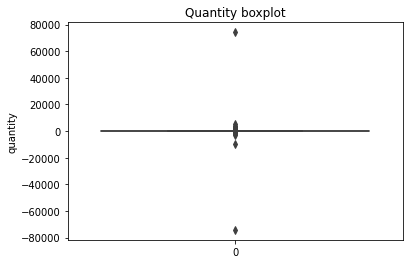

In [36]:
ax = sns.boxplot(data=retail['quantity'])
ax.set(ylabel='quantity', title='Quantity boxplot')

plt.show()

In [37]:
retail = retail.loc[retail['quantity'] < np.quantile(retail['quantity'], 0.99)]
retail = retail.loc[retail['quantity'] > 0]

In [38]:
retail = retail.loc[retail['quantity'] >= 0]

In [39]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68747 entries, 0 to 105334
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   purchase_id        68747 non-null  object        
 1   item_id            68747 non-null  object        
 2   quantity           68747 non-null  int64         
 3   purchase_datetime  68747 non-null  datetime64[ns]
 4   customer_id        68747 non-null  object        
 5   shop_id            68747 non-null  object        
 6   loyalty_program    68747 non-null  bool          
 7   category           68747 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 4.3+ MB


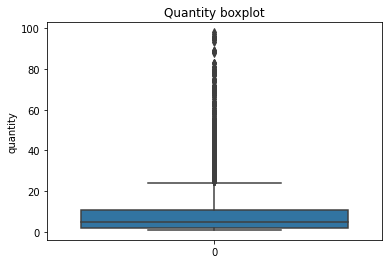

In [40]:
ax = sns.boxplot(data=retail['quantity'])
ax.set(ylabel='quantity', title='Quantity boxplot')

plt.show()

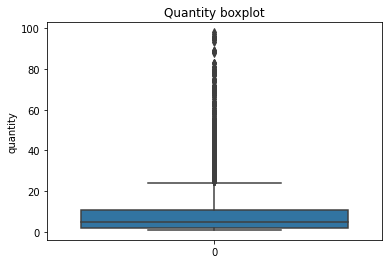

In [41]:
ax = sns.boxplot(data=retail['quantity'])
ax.set(ylabel='quantity', title='Quantity boxplot')

plt.show()

### Прочее

In [42]:
retail['purchase_datetime'].min()

Timestamp('2016-12-01 08:26:00')

In [43]:
retail['purchase_datetime'].max()

Timestamp('2017-02-28 17:01:00')

In [44]:
retail['shop_id'].nunique()

31

In [45]:
retail['shop_id'].sort_values().unique()

array(['Shop 0', 'Shop 1', 'Shop 10', 'Shop 11', 'Shop 12', 'Shop 13',
       'Shop 14', 'Shop 15', 'Shop 16', 'Shop 17', 'Shop 18', 'Shop 19',
       'Shop 2', 'Shop 20', 'Shop 21', 'Shop 22', 'Shop 23', 'Shop 24',
       'Shop 25', 'Shop 26', 'Shop 27', 'Shop 28', 'Shop 29', 'Shop 3',
       'Shop 30', 'Shop 4', 'Shop 5', 'Shop 6', 'Shop 7', 'Shop 8',
       'Shop 9'], dtype=object)

In [46]:
shop_data = retail.merge(product, on='item_id', how='left')
shop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68747 entries, 0 to 68746
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   purchase_id        68747 non-null  object        
 1   item_id            68747 non-null  object        
 2   quantity           68747 non-null  int64         
 3   purchase_datetime  68747 non-null  datetime64[ns]
 4   customer_id        68747 non-null  object        
 5   shop_id            68747 non-null  object        
 6   loyalty_program    68747 non-null  bool          
 7   category_x         68747 non-null  object        
 8   price_per_one      68747 non-null  float64       
 9   category_y         68747 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 5.3+ MB


In [47]:
shop_data = shop_data.drop(columns=['category_y'])
shop_data = shop_data.rename(columns={'category_x':'category'})

In [48]:
shop_data['total'] = shop_data['quantity'] * shop_data['price_per_one']

In [49]:
shop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68747 entries, 0 to 68746
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   purchase_id        68747 non-null  object        
 1   item_id            68747 non-null  object        
 2   quantity           68747 non-null  int64         
 3   purchase_datetime  68747 non-null  datetime64[ns]
 4   customer_id        68747 non-null  object        
 5   shop_id            68747 non-null  object        
 6   loyalty_program    68747 non-null  bool          
 7   category           68747 non-null  object        
 8   price_per_one      68747 non-null  float64       
 9   total              68747 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 5.3+ MB


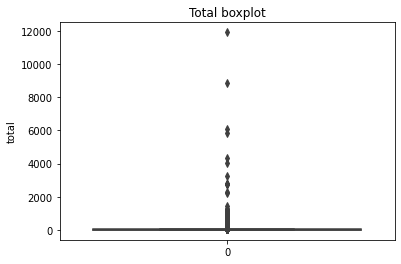

In [50]:
ax = sns.boxplot(data=shop_data['total'])
ax.set(ylabel='total', title='Total boxplot')

plt.show()

In [51]:
shop_data = shop_data.loc[shop_data['total'] < np.quantile(shop_data['total'], 0.99)]

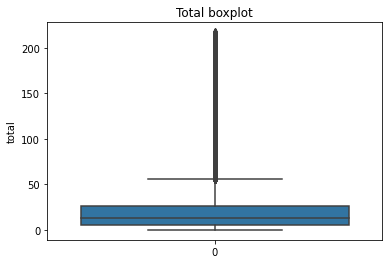

In [52]:
ax = sns.boxplot(data=shop_data['total'])
ax.set(ylabel='total', title='Total boxplot')

plt.show()

In [53]:
shop_data['purchase_date'] = pd.to_datetime(shop_data['purchase_datetime'].dt.date)

### Вывод по предобработке

- Названия колонок приведены к “хорошему стилю“ языка python
- Поле product\_id отношения product переименовано в item\_id
- Добавлена категоризация товаров на основе поля item_id
- (предположительно это отмененные заказы)
- поле purchase_date приведено к типу datetime
- поле loyality_program приведено к типу bool
- удалены дубликаты из отношения retail
- в отношении product удалены неявные дубликаты в поле item\_id, значения price\_per_one заменены на среднее для соответствующего товара
- пропуски в поле customer_id заменены на значение none
- удалены аномалии из столбца quantity
- отрицательные значения quantity перемещены в отдельное отношение cancelled
- провалидированы данные по дате покупки
- провалидированы данные по shop_id
- данные отношений retail, product объединены в отношение shop_data
- добавлен расчет общей суммы заказа
- удалены аномалии в общей сумме заказа
- поле purchase_date переименовано в purchase_datetime
- добавлено поле purchase_date, содержащее дату заказа

## Исследовательский анализ данных

In [54]:
shop_data.head()

,purchase_id,item_id,quantity,purchase_datetime,customer_id,shop_id,loyalty_program,category,price_per_one,total,purchase_date
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,False,none,1.810000,19.910000,2016-12-10
1,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,True,none,1.474000,10.318000,2016-12-14
2,541424,79321,1,2017-01-17 17:57:00,none,Shop 0,False,none,7.013636,7.013636,2017-01-17
3,537795,82494L,5,2016-12-08 13:03:00,22892.0,Shop 0,True,L,5.145000,25.725000,2016-12-08
4,541696,22197,4,2017-01-20 18:08:00,none,Shop 0,False,none,1.215000,4.860000,2017-01-20


In [55]:
total_bill = shop_data.groupby(by='purchase_id').agg({'total':'sum', 'loyalty_program':'first'})\
    .rename(columns={'total':'total_bill'})
total_bill

,total_bill,loyalty_program
purchase_id,,
536365,184.471417,True
536366,20.400000,True
536367,295.588750,False
536368,84.470000,False
536369,16.600000,False
...,...,...
545214,212.104667,True
545215,647.592619,False
545216,542.288714,False


In [56]:
avg_bill = total_bill.groupby(by='loyalty_program').agg({'total_bill':'mean'})\
    .rename(columns={'total_bill':'avg_bill'})
avg_bill

,avg_bill
loyalty_program,
False,462.108914
True,354.709133


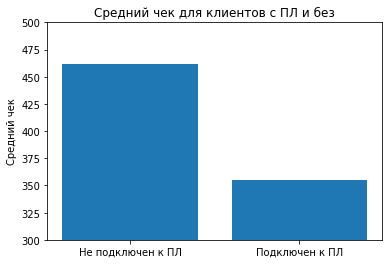

In [57]:
plt.bar(['Не подключен к ПЛ', 'Подключен к ПЛ'], avg_bill['avg_bill'])
plt.ylim(300, 500)
plt.ylabel('Средний чек')
plt.title('Средний чек для клиентов с ПЛ и без')

plt.show()

Средний чек у клиентов не подключенных к ПЛ намного выше

In [58]:
total_quantity = shop_data.groupby(by='purchase_id').agg({'quantity':'sum', 'loyalty_program':'first'})\
    .rename(columns={'quantity':'total_quantity'})
total_quantity

,total_quantity,loyalty_program
purchase_id,,
536365,33,True
536366,10,True
536367,71,False
536368,11,False
536369,2,False
...,...,...
545214,90,True
545215,239,False
545216,190,False


In [59]:
avg_quantity = total_quantity.groupby(by='loyalty_program').agg({'total_quantity':'mean'})\
    .rename(columns={'total_quantity':'avg_quantity'})
avg_quantity

,avg_quantity
loyalty_program,
False,172.078766
True,132.868791


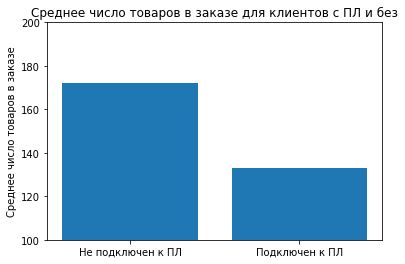

In [60]:
plt.bar(['Не подключен к ПЛ', 'Подключен к ПЛ'], avg_quantity['avg_quantity'])
plt.ylim(100, 200)
plt.ylabel('Среднее число товаров в заказе')
plt.title('Среднее число товаров в заказе для клиентов с ПЛ и без')

plt.show()

Среднее число товаров в заказе для клиентов без ПЛ намного выше

Среднее число товаров в одной покупке отличается незначительно

In [61]:
_p = shop_data.groupby(by='loyalty_program').agg({'purchase_id':'nunique'})

In [62]:
_c = shop_data.groupby(by='loyalty_program').agg({'customer_id':'nunique'})

In [63]:
purchase_per_user = _p.merge(_c, on=_p.index, how='left')

In [64]:
purchase_per_user['ppu'] = purchase_per_user['purchase_id']/purchase_per_user['customer_id']
purchase_per_user

,key_0,purchase_id,customer_id,ppu
0,False,2463,1080,2.280556
1,True,1067,546,1.954212


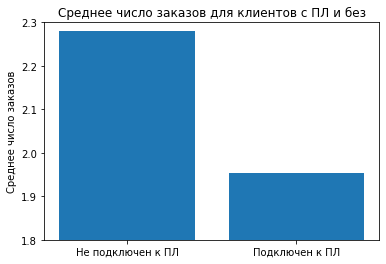

In [65]:
plt.bar(['Не подключен к ПЛ', 'Подключен к ПЛ'], purchase_per_user['ppu'])
plt.ylim(1.8, 2.3)
plt.ylabel('Среднee число заказов')
plt.title('Среднee число заказов для клиентов с ПЛ и без')

plt.show()

Клиенты не пользующиеся программой лояльности в среднем делают больше заказов

In [66]:
def customer_isnum(row):
    try:
        int(row[4])
        return 1
    except:
        return 0

In [67]:
shop_data['correct_customer_id'] = shop_data.apply(customer_isnum, axis=1)

In [68]:
shop_data['correct_customer_id'].value_counts()

1    52116
0    15883
Name: correct_customer_id, dtype: int64

In [69]:
data_for_ltv = shop_data.query('correct_customer_id == 1')

In [70]:
def get_profiles(data):

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        data.sort_values(by=['customer_id', 'purchase_datetime'])
        .groupby('customer_id')
        .agg({'purchase_datetime': 'first', 'loyalty_program':'first'})
        .rename(columns={'purchase_datetime': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    return profiles

In [71]:
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили
    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['customer_id', 'purchase_date', 'total']],
        on='customer_id',
        how='left',
    )
    
    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['purchase_date'] - result_raw['first_ts']
    ).dt.days


    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 4. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='total',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 5. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 6. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'customer_id': 'nunique'})
            .rename(columns={'customer_id': 'cohort_size'})
        )

        # Шаг 7. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 8. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

In [72]:
profiles = get_profiles(shop_data)

In [73]:
#profiles['loyalty_program'].value_counts()

In [74]:
profiles.head()

,customer_id,first_ts,loyalty_program,dt,month
0,18026.0,2016-12-07 14:57:00,False,2016-12-07,2016-12-01
1,18027.0,2016-12-16 19:09:00,False,2016-12-16,2016-12-01
2,18029.0,2017-02-02 16:01:00,False,2017-02-02,2017-02-01
3,18031.0,2017-02-16 12:33:00,False,2017-02-16,2017-02-01
4,18035.0,2017-01-18 09:50:00,False,2017-01-18,2017-01-01


In [75]:
shop_data.head()

,purchase_id,item_id,quantity,purchase_datetime,customer_id,shop_id,loyalty_program,category,price_per_one,total,purchase_date,correct_customer_id
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,False,none,1.810000,19.910000,2016-12-10,1
1,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,True,none,1.474000,10.318000,2016-12-14,1
2,541424,79321,1,2017-01-17 17:57:00,none,Shop 0,False,none,7.013636,7.013636,2017-01-17,0
3,537795,82494L,5,2016-12-08 13:03:00,22892.0,Shop 0,True,L,5.145000,25.725000,2016-12-08,1
4,541696,22197,4,2017-01-20 18:08:00,none,Shop 0,False,none,1.215000,4.860000,2017-01-20,0


In [76]:
ltv_raw, ltv, ltv_history = get_ltv(
    profiles, shop_data[['customer_id', 'purchase_date', 'total']], datetime(2016, 12, 16).date(), 7
)

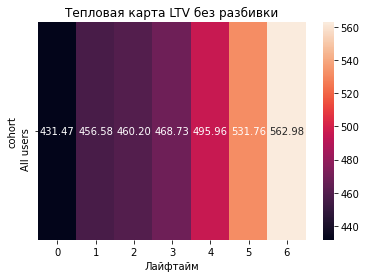

In [77]:
sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV без разбивки')
plt.xlabel('Лайфтайм')
plt.show()

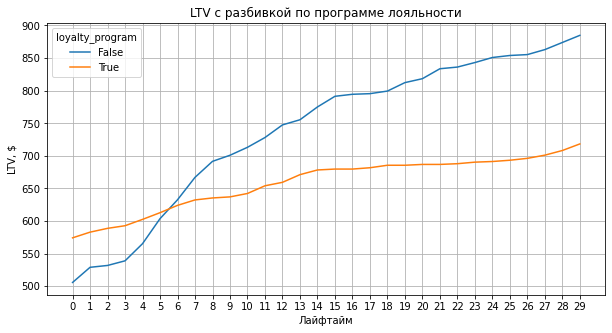

In [78]:
ltv_raw, ltv, ltv_history = get_ltv(
    profiles, shop_data[['customer_id', 'purchase_date', 'total']], datetime(2017, 2, 1).date(), 30, dimensions=['loyalty_program']
)



report = ltv.drop(columns=['cohort_size'])
report.loc[True] += 200
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по программе лояльности')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

In [79]:
profiles.head()

,customer_id,first_ts,loyalty_program,dt,month
0,18026.0,2016-12-07 14:57:00,False,2016-12-07,2016-12-01
1,18027.0,2016-12-16 19:09:00,False,2016-12-16,2016-12-01
2,18029.0,2017-02-02 16:01:00,False,2017-02-02,2017-02-01
3,18031.0,2017-02-16 12:33:00,False,2017-02-16,2017-02-01
4,18035.0,2017-01-18 09:50:00,False,2017-01-18,2017-01-01


In [80]:
profiles['dt'].min()

datetime.date(2016, 12, 1)

In [81]:
profiles['dt'].max()

datetime.date(2017, 2, 28)

LTV клиентов, пользующихся программой лояльности намного меньше чем у тех, кто ей не пользуется

### Вывод по исследовательскому анализу данных:
- Средний чек у клиентов без ПЛ значительно больше
- Число товаров в заказе у клиентов без ПЛ значительно больше
- Число заказов у клиентов с ПЛ больше
- LTV пользователей без программы лояльности ниже в начале периода, затем становится выше

ПЛ в ее нынешнем виде точно не стоит раскатывать на всех клиентов. Единственное ее применение, которое я вижу - это применять ПЛ к сегменту клиентов, в котором число заказов имеет решающее значение, если такой сегмент есть. Также есть гипотеза, что ПЛ может удержать клиентов от ухода и/или вернуть уже ушедших клиентов.

## Статистический анализ

H0: Средний чек для двух групп (с ПЛ и без) одинаковый  
H1: Средний чек для двух групп (с ПЛ и без) разный

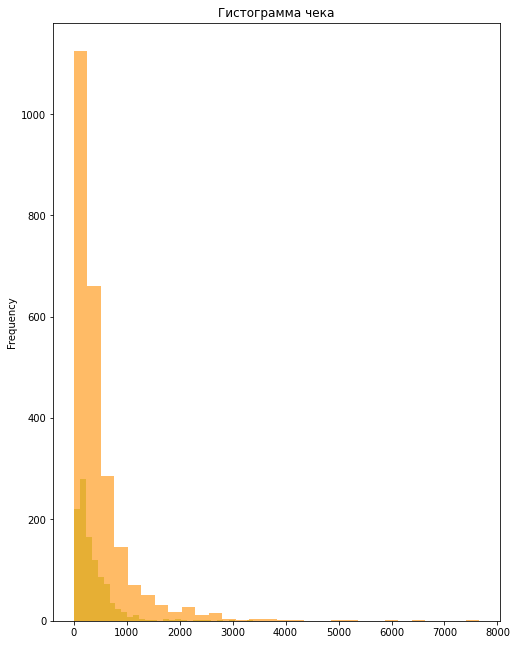

In [82]:
plt.figure(figsize=(8,11))
x = total_bill.query('loyalty_program == 1')['total_bill']
y = total_bill.query('loyalty_program == 0')['total_bill']
plt.hist(x, bins=30, color='yellowgreen' , alpha=0.6)
plt.hist(y, bins=30, color='#FF8F00' , alpha=0.6)
plt.gca().set(title='Гистограмма чека', ylabel='Frequency')
plt.show()

In [83]:
p_value = st.mannwhitneyu(total_bill.query('loyalty_program == 1')['total_bill'],
             total_bill.query('loyalty_program == 0')['total_bill'])
p_value

MannwhitneyuResult(statistic=1227535.5, pvalue=0.001872913202458439)

Найдено статистически значимое различие в среднем чеке между группами

H0: Среднее число товаров в заказе двух групп (с ПЛ и без) одинаковое  
H1: Среднее число товаров в заказе двух групп (с ПЛ и без) разное

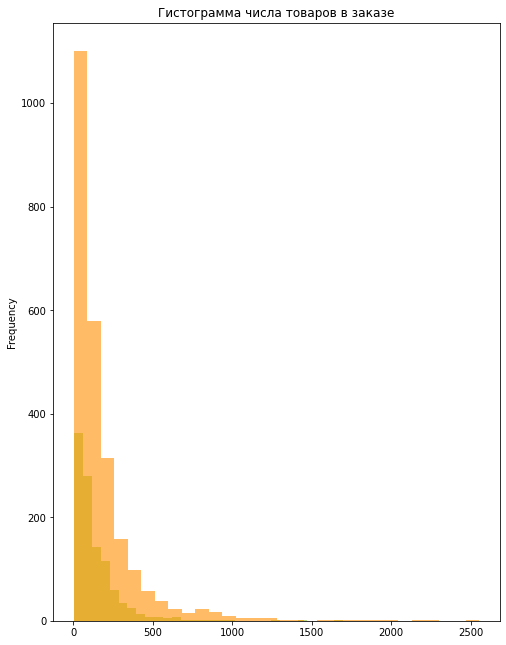

In [84]:
plt.figure(figsize=(8,11))
x = total_quantity.query('loyalty_program == 1')['total_quantity']
y = total_quantity.query('loyalty_program == 0')['total_quantity']
plt.hist(x, bins=30, color='yellowgreen' , alpha=0.6)
plt.hist(y, bins=30, color='#FF8F00' , alpha=0.6)
plt.gca().set(title='Гистограмма числа товаров в заказе', ylabel='Frequency')

plt.show()

In [85]:
p_value = st.mannwhitneyu(total_quantity.query('loyalty_program == 1')['total_quantity'],
             total_quantity.query('loyalty_program == 0')['total_quantity'])
p_value

MannwhitneyuResult(statistic=1242009.0, pvalue=0.009618914758743878)

Найдено статистически значимое различие между числом возвратов в группах

## Общий вывод

Вывод по предобработке данных:

- Названия колонок приведены к “хорошему стилю“ языка python
- Поле product\_id отношения product переименовано в item\_id
- Добавлена категоризация товаров на основе поля item_id
- (предположительно это отмененные заказы)
- поле purchase_date приведено к типу datetime
- поле loyality_program приведено к типу bool
- удалены дубликаты из отношения retail
- в отношении product удалены неявные дубликаты в поле item\_id, значения price\\_per\_one заменены на среднее для соответствующего товара
- пропуски в поле customer_id заменены на значение none
- удалены аномалии из столбца quantity
- отрицательные значения quantity перемещены в отдельное отношение cancelled
- провалидированы данные по дате покупки
- провалидированы данные по shop_id
- данные отношений retail, product объединены в отношение shop_data
- добавлен расчет общей суммы заказа
- удалены аномалии в общей сумме заказа
- поле purchase\_date переименовано в purchase\_datetime
- добавлено поле purchase_date, содержащее дату заказа

Вывод по исследовательскому анализу данных:

- Рассчитан средний чек, среднее число товаров в заказе, среднее число заказов в зависимости от того, пользуется ли клиент программой лояльности: клиенты, не пользующиеся программой лояльности в среднем оформляют больше заказов, остальные метрики примерно на одном уровне
- LTV пользователей без программы лояльности значительно выше на протяжении всего исследуемого периода
- MAU больше всего в 12 месяце 2016 года, в 1 и 2 месяце 2017 примерно на одном уровне
- месячный sticky factor 5.76%, недельный 20.35% - находится в пределах нормы

Вывод по статистическому анализу данных:

- Нет статистически значимого различия в среднем чеке для клиентов с ПЛ и без нее
- Нет статистически значимого различия в числе возвращенных единиц товара (quantity) для клиентов с ПЛ и без нее.

Программа лояльности не работает. ПЛ в ее нынешнем виде точно не стоит раскатывать на всех клиентов. Единственное ее применение, которое я вижу - это применять ПЛ к сегменту клиентов, в котором число заказов имеет решающее значение, если такой сегмент есть. Рекомендую доработать ПЛ и/или исследовать сегменты клиентов, чтобы найти тех клиентов, к которым можно применить ПЛ в ее нынешнем виде. Также есть гипотеза, что ПЛ может удержать клиентов от ухода и вернуть уже ушедших клиентов, для ее проверки нужны дополнительные данные. 

## Презентация

[Ссылка на презентацию](https://1drv.ms/u/s!AuzllpzvT5ad6x6RpgsNj23gp5X2?e=D4IwIg)